# Weather classification
Based on seattle-weather.csv database

Creazione di un modello classificatore che dati % di precipitazioni, temperatura massima e minima e velocità del vento, mi predice 'weather'

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Caricamento dataset
df = pd.read_csv('./seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [69]:
df.shape

(1461, 6)

Analisi variabili temp_max e temp_min

In [70]:
print("Valori max e min di 'temp_max': ")
print(df['temp_max'].min(),df['temp_max'].max())
print("Valori max e min di 'temp_min': ")
print(df['temp_min'].min(),df['temp_min'].max())

Valori max e min di 'temp_max': 
-1.6 35.6
Valori max e min di 'temp_min': 
-7.1 18.3


Sono espresse in gradi Celsius.

## Rimuovo colonne non utili
All'interno del dataset è presente la colonna 'date' non utile ai fini del classificatore.

In [71]:
df.drop(['date'],axis=1, inplace=True)

In [72]:
df.shape

(1461, 5)

### Controllo valori nulli

In [73]:
df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

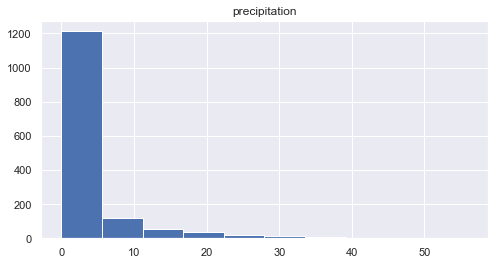

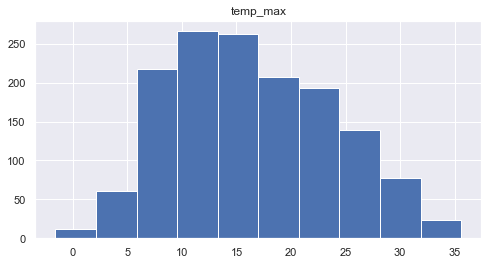

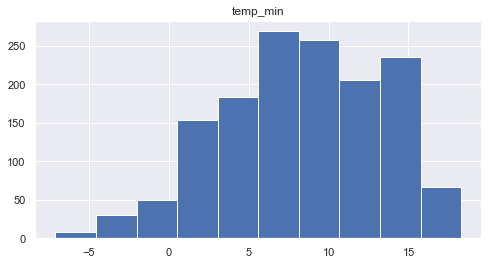

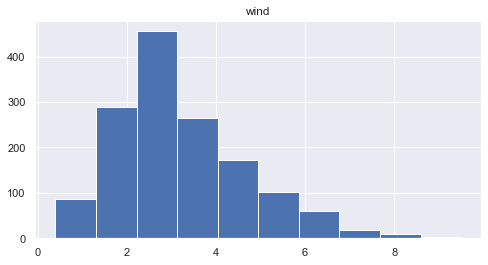

In [74]:
num=['precipitation', 'temp_max', 'temp_min', 'wind']
for col in num:
  plt.figure(figsize=(8,4))
  plt.hist(df[col])
  plt.title(col)
  plt.show()

In [75]:
df.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

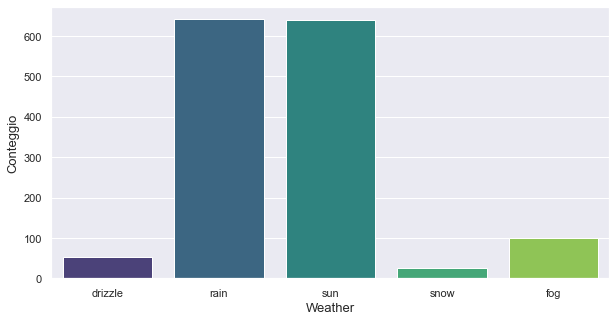

In [76]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = df, palette="viridis")
plt.xlabel("Weather",size=13)
plt.ylabel("Conteggio",size=13)
plt.show()

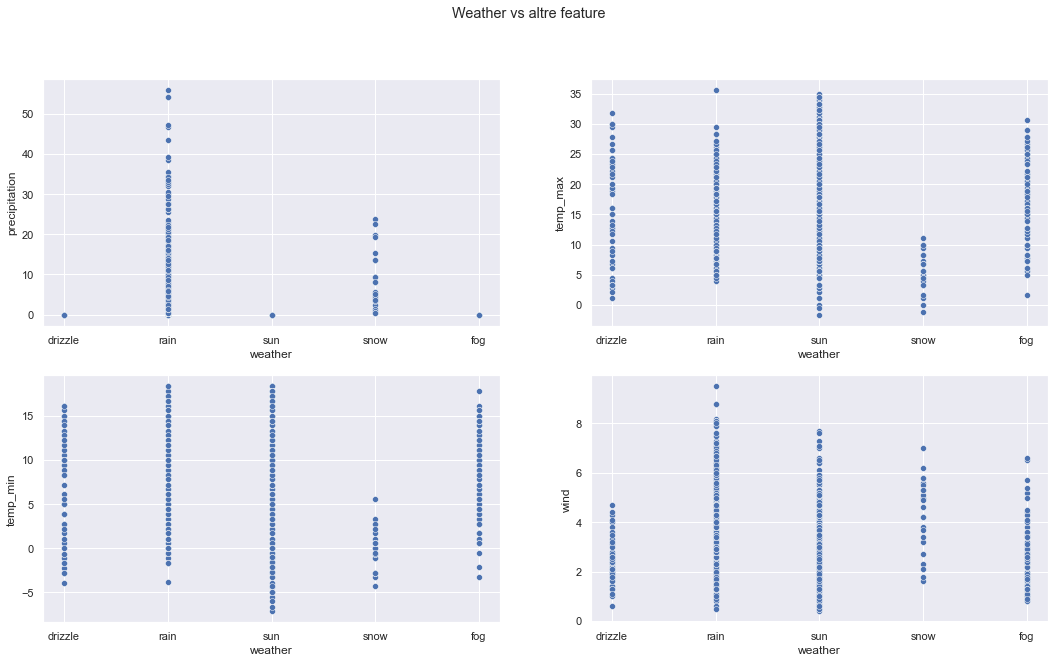

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Weather vs altre feature')

sns.scatterplot(ax=axes[0, 0], data=df, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=df, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=df, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=df, x='weather', y='wind')
plt.show()

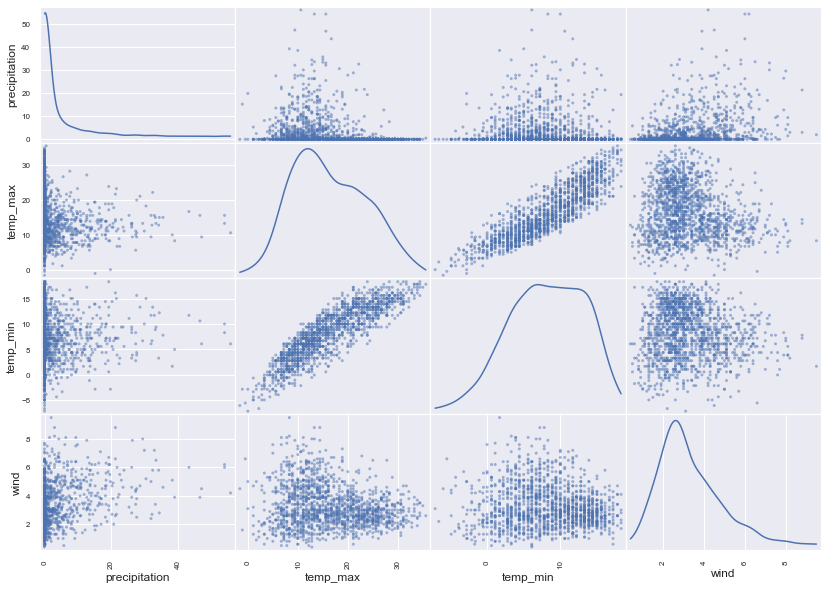

In [78]:
df_ = pd.concat([df['precipitation'], df['temp_max'], df['temp_min'], df['wind']], axis=1)
pd.plotting.scatter_matrix(df_, diagonal='kde', figsize=(14, 10))
plt.show()

## Codifico 'weather'

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.weather = le.fit_transform(df.weather)

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}


### Matrice di Correlazione

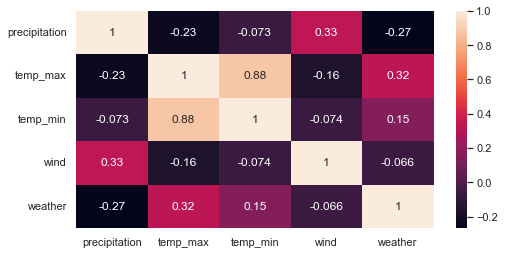

In [80]:
corr = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr,annot=True)
plt.show()

In [81]:
df.weather.unique()

array([0, 2, 4, 3, 1])

## Modello

In [82]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [83]:
x=df.drop('weather',axis=1)
y=df['weather']
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

### Standardizzo i valori

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### XGBClassifier

In [85]:
from xgboost import XGBClassifier

xgboost_model=XGBClassifier()
xgboost_model.fit(X_train,y_train)
predict = xgboost_model.predict(X_test)

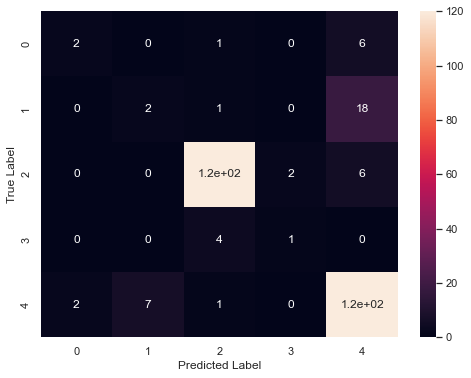

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm,annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [87]:
xgboost_acc = accuracy_score(y_test,predict)
print(xgboost_acc*100)

83.61774744027304


### Regressione Logistica

In [88]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg_model = LogisticRegression(solver='liblinear', random_state=20)


# fit the model
logreg_model.fit(X_train, y_train)
y_pred_test = logreg_model.predict(X_test)

y_pred_test

array([2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4,
       2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 2])

In [89]:
print(y_test)

855     2
381     0
721     2
577     4
35      4
       ..
842     2
1059    2
1014    2
387     0
1220    2
Name: weather, Length: 293, dtype: int64


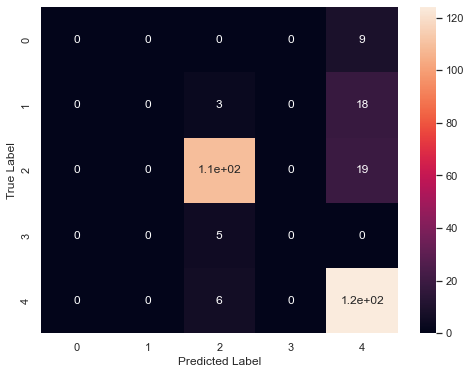

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm,annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [91]:
logreg_acc = accuracy_score(y_test,y_pred_test)
print(logreg_acc*100)

79.5221843003413


### SVM

In [92]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', random_state = 15)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

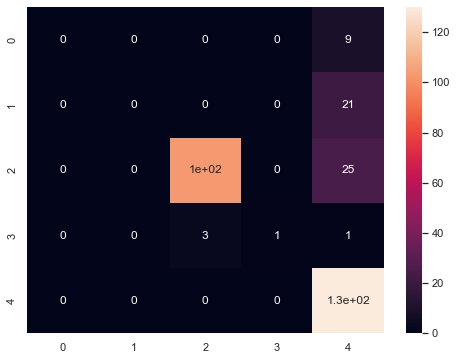

In [93]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [94]:
svm_acc = accuracy_score(y_test,y_pred)
print(svm_acc*100)

79.86348122866895


### Random Forest

<AxesSubplot:>

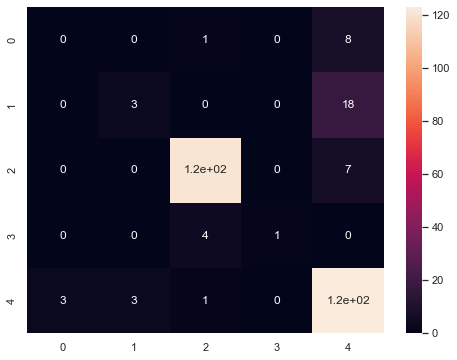

In [95]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [96]:
rf_acc = forest.score(X_test,y_test)
print(rf_acc*100)

84.64163822525597


## Confronto modelli

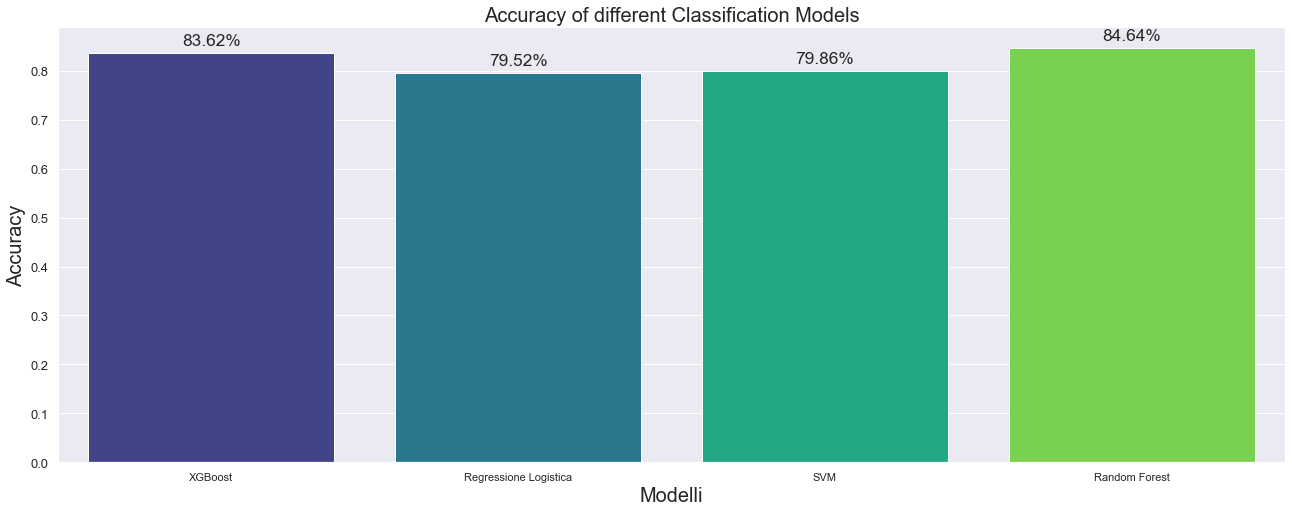

In [97]:
nomi = ['XGBoost','Regressione Logistica','SVM','Random Forest']
modelli = [xgboost_acc,logreg_acc, svm_acc, rf_acc]

plt.rcParams['figure.figsize']=8,6
plt.figure(figsize=(22,8))
ax = sns.barplot(x=nomi, y=modelli, palette = "viridis", saturation =1.5)
plt.xlabel("Modelli", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center')
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Test

In [98]:
import numpy as np
print(le_name_mapping)
feature_columns = ['temp_min','temp_max', 'precipitation', 'wind', 'weather']
scaler_columns = ['temp_min','temp_max', 'precipitation', 'wind']
data = {
    'temp_min':[6.1],'temp_max':[9.7], 'precipitation':[0], 'wind':[5.3]}


df_ = pd.DataFrame(data)
trasformed = sc.transform(df_[scaler_columns])

df_t = pd.DataFrame(trasformed, columns=scaler_columns)
print(df_t)

result = forest.predict(df_t)
df_t['weather'] = result
unscaled = sc.inverse_transform(df_t[scaler_columns])
df_ = pd.DataFrame(unscaled, columns=scaler_columns)
print(df_)
print('weather predetta:',result)

{'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}
   temp_min  temp_max  precipitation     wind
0  0.474021 -0.911649      -1.637742  1.46013
   temp_min  temp_max  precipitation  wind
0       6.1       9.7            0.0   5.3
weather predetta: [3]
